# Referencias:

Fontes principais:
- <a id='dePrado'><span style='color:red'>dePrado</span></a>: *Advances in Financial Machine Learning*
- <a id='AFTS'><span style='color:red'>AFTS</span></a>: *Analysis of Financial Time Series*

Livros:
- <a id='intro_book'><span style='color:red'>intro_book</span></a>: An Introductory Study on Time-Series Modeling and Forecast
- <a id='forecasting'><span style='color:red'>forecasting<span></a>: Forecasting: Methods and Applications (HYNDMAN, Rob)

Artigos:
- <a id='hetero'><span style='color:red'>hetero</span></a>: Conditional heteroskedasticity in crypto-assets return
- <a id='ref_2'><span style='color:red'>ref_2</span></a>: Machine Learning Strategies for Time Series Forecasting
- <a id='ref_3'><span style='color:red'>ref_3</span></a>: Financial Series Prediction - Comparison Between Precision of Time Series Models and Machine Learning Methods
- <a id='ref_4'><span style='color:red'>ref_4</span></a>: The 10 reasons most machine learning funds fail
- <a id='ref_6'><span style='color:red'>ref_6</span></a>: Application of machine learning techniques for stock market prediction
- <a id='ref_7'><span style='color:red'>ref_7</span></a>: Time Series Data Prediction and Analysis
- <a id='ref_8'><span style='color:red'>ref_8</span></a>: Text Mining for Market Prediction - A Systematic Review

Links:
- <a id='xenon'><span style='color:red'>xenon</span></a>: https://www.xenonstack.com/blog/data-science/time-series-analysis-forecasting-using-machine-learning-deep-learning
- <a id='towards'><span style='color:red'>towards</span></a>: https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
- <a id='vidhya'><span style='color:red'>vidhya</span></a>: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
- <a id='vidhya2'><span style='color:red'>vidhya2</span></a>: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
- <a id='duke'><span style='color:red'>duke</span></a>: https://people.duke.edu/~rnau/411diff.htm
- <a id='auquan'><span style='color:red'>auquan</span></a>: https://medium.com/auquan/tagged/mathematics
- <a id='quantinsti'><span style='color:red'>quantinsti</span></a>: https://www.quantinsti.com/blog/forecasting-stock-returns-using-arima-model/
- <a id='ethz'><span style='color:red'>ethz</span></a>: http://stat.ethz.ch/~nicolai/timeseries/week2.pdf
- <a id='hyndman'><span style='color:red'>hyndman</span></a>: https://robjhyndman.com/talks/RevolutionR/8-Differencing.pdf - **bom resumo pra passar pro povo**
- <a id='statsmodel'><span style='color:red'>statsmodel</span></a>: https://www.statsmodels.org/stable/index.html
- <a id='stationarity'><span style='color:red'>stationarity</span></a>: https://stats.stackexchange.com/questions/19715/why-does-a-time-series-have-to-be-stationary & https://stats.stackexchange.com/questions/55477/stationarity-requirement-why
- <a id='arch'><span style='color:red'>arch</span></a>: http://arch.readthedocs.io/en/latest/unitroot/unitroot.html
- <a id='samir'><span style='color:red'>samir</span></a>: https://ufsj.edu.br/portal2-repositorio/File/martins/cap12_samir.pdf
- <a id='harvard'><span style='color:red'>harvard</span></a>: http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-17.html - Harvard Lectures in Python
- <a id='quantstart'><span style='color:red'>quantstart</span></a>: https://www.quantstart.com/articles/Generalised-Autoregressive-Conditional-Heteroskedasticity-GARCH-p-q-Models-for-Time-Series-Analysis

# Roteiro

## 1. Data Generation/Collection/Import

- Pegar dados da pasta 'Data'

## 2. Data Preparation

- Handling missing values

## 3. Data Visualization

- Plots
    - Raw data
    - Variations (SEE [AFTS-1.1](#AFTS))
        - One period simple return ($R_t$)
        - Multiperiod simple return
        - Log return ($r_t$)
    - Seasonal

## 4. Exploratory Analysis

1. Stationarity (why stationary? SEE [stationarity](#stationarity))
    - Properties
        - Constant mean, constant variance, autocovariance independent in time (SEE [vidhya](#vidhya) / [ethz](#ethz))
    - Methods for verification
        - Rolling statistics (average/variance) - visual technique (SEE [vidhya](#vidhya) / [xenon](#xenon))
        - Unit-root tests (SEE [arch](#arch))
            - Augmented Dickey-Fuller
            - Dickey-Fuller GLS
            - Phillips-Perron
        - Stationarity test (SEE [arch](#arch))
            - KPSS
- Decomposition
    - Models
        - Multiplicative model
        - Additive model
    - Components
        - Trend
        - Seasonal
            - Test: autocorrelation for last 12 months
        - Noise
    - Tools
        - `Prophet` (SEE [towards](#towards))
        - `from statsmodels.tsa.seasonal import seasonal_decompose` (SEE [vidhya](#vidhya))
    - Validation
        - Noise component is white noise
            - QQ plot
        
### OBSERVATION
Segundo https://stats.stackexchange.com/questions/148004/testing-for-autocorrelation-ljung-box-versus-breusch-godfrey, **Ljung-Box e Durbin Watson nao sao bons 'to test serial correlation'** - especificamente: 'The Ljung-Box Q statistic is not valid in an autoregressive model, because it cannot be said to have an asymptotic chi-square distribution under the null.'

Deve-se, portanto, favorecer o **Breusch-Godfrey LM test for serial correlation** ('LM' de lagrange multipliers).

Segundo o Wikipedia, Durbin-Watson testa autocorrelacao de **lag-1** apenas.

O teste de Breusch-Godfrey do Statsmodels e' utilizado *com o resultado de uma regressao*, i.e., nao da pra usar em uma serie temporal avulsa.
      
### <span style='color:indianred'>DUVIDAS</span>     

*Duvida*: Test for serial correlation vs test for unit root: https://stats.stackexchange.com/questions/27882/what-is-the-difference-between-serial-correlation-and-having-a-unit-root.<br> 
*Resposta (Wikipedia)*: Unit root tests are closely linked to serial correlation tests. However, **while all processes with a unit root will exhibit serial correlation, not all serially correlated time series will have a unit root.**
        
*Duvida*: [Slides FinQuant] [Reuniao Cristiano Arbex] E' sempre bom utilizar log-returns?? Quais as vantagens?


## 5. Data Transformation

1. Outlier Detection?
    - **Hampel filter**
- Stationarization
    - Eliminating components
        - Differencing
            - Sometimes detrending is not enough to make a series stationary
            - May be performed multiple times
                - **Simple**($x(t)-x(t-1)$) vs **relative**($(x(t)-x(t-1))/x(t-1)$)
            - **Fractional differencing** (de Prado)
            - If detrending works (makes the series stationary), then the series is called **trend-stationary**.
        - Deseasonalization
            - **Seasonal differencing**
                - ACF helps see the seasonality
                - 'Non-seasonal differencing first; then, one seasonal differencing with *lag* ...' (SEE [ref_7 - 4.2](#ref_7))
            - **Backshift notation**
                - 'The “backshift” notation is convenient because the terms can be multiplied together to see the combined effect.' - [hyndman - penultimo slide](#hyndman)
        - Detrending
            - *Including* the time index as an independent variable in a regression or ARIMA model ([duke](#duke))
            - *Aggregation*: average for a period of like weekly/monthly averages (SEE [vidhya](#vidhya))
            - *Smoothing*: moving averages (SEE [vidhya](#vidhya))
            - *Polynomial Fitting*: regression model (SEE [vidhya](#vidhya))
                - Fitting a trend line and subtracting it out prior to fitting a model (SEE [duke](#duke))
            - If detrending works (makes the series stationary), then the series is called **trend-stationary**.
        - Denoising
            - Smoothing
                - Performs some kind of local averaging (SEE [ref_7](#ref_7))
                    - Moving average filter
                    - Median filter
                    - Local regression filter
                - Local regression smoothing
                - Exponential smoothing
                    - Single exponential smooothing
                    - **Holt-Winters** trend and seasonality method (SEE [forecasting](#forecasting))
    - Validation
        - Stationarity of residuals
- Log Transform
    - Logarithmic return
    

**OBS**.: Sempre notar o que deve ser feito apenas para o conjunto de treinamento (e nao teste)

## <span style='color:red'>0.</span> Imports

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import sklearn.preprocessing as skp

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
import arch.unitroot as au

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
py.init_notebook_mode(connected=True)

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Source: auquan
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [3]:
# Adaptado de: Stock_Download-data.ipynb
def plotscatter(df, columns=None, name='Stock name', title='Stock price', yaxis='Preco'):
    if columns is None: columns=df.columns
        
    # 1) Traces
    df_data = list(go.Scatter(x=df.index, y=df[col], name=col) for col in columns)

    # 2) Layout
    df_layout = go.Layout(title=title, legend={'orientation':'h'}, yaxis={'title':yaxis})

    # 3) Figure
    df_fig = go.Figure(data=df_data, layout=df_layout)
    py.iplot(df_fig)

In [4]:
def subplotscatter(df, columns=None, title='Stock price'):
    if columns is None: columns=df.columns
        
    # Traces
    df_data = list(go.Scatter(x=df.index, y=df[col], name=col) for col in columns)
    
    # Figure
    df_fig = tools.make_subplots(rows=len(columns), cols=1, shared_xaxes=True)
    for row in range(len(columns)): df_fig.append_trace(df_data[row], row+1, 1) 
    
    # Layout
    df_fig.layout.update(title=title, legend=dict(orientation='h'), height=700)
    py.iplot(df_fig)

## 1. Data Generation

In [5]:
# White noise
ts1_ind = pd.DatetimeIndex(start='2015-01-01', end='2018-04-30', freq=pd.Timedelta(days = 1)) # indices

# Valores
np.random.seed(1)
ts1_val = np.random.randn(len(ts1_ind)) + 10

# DataFrame
ts1 = pd.DataFrame(data=ts1_val, index=ts1_ind, columns=['Values'])

In [6]:
plotscatter(ts1, columns=['Values'], name='ts1', title='ts1: White Noise')

In [7]:
# Linear trend + noise
ts2_ind = pd.DatetimeIndex(start='2015-01-01', end='2018-04-30', freq=pd.Timedelta(days = 1)) # indices
n = len(ts2_ind)

# Valores
np.random.seed(2)
ts2_val = np.arange(n)*0.01 + np.random.randn(n) + 10

# DataFrame
ts2 = pd.DataFrame(data=ts2_val, index=ts2_ind, columns=['Values'])

In [8]:
plotscatter(ts2, columns=['Values'], name='ts2', title='ts2: Linear trend + white noise')

In [9]:
# Linear trend + annual seasonality + white noise
ts3_ind = pd.DatetimeIndex(start='2015-01-01', end='2018-04-30', freq=pd.Timedelta(days = 1)) # indices
n = len(ts3_ind)

# Valores
np.random.seed(3)
trend = np.arange(n)*0.01
season = np.sin((2*np.pi)*(np.arange(n)/365))
noise = np.random.randn(n)
offset = 10 # so pra nao ficar negativo
ts3_val = trend + season + noise + offset

# DataFrame
ts3 = pd.DataFrame(data=ts3_val, index=ts3_ind, columns=['Values'])

In [10]:
plotscatter(ts3, columns=['Values'], name='ts3', title='ts3: Linear trend + annual seasonality + white noise')

In [11]:
# Linear trend + annual seasonality + white noise with integration effect
ts4_ind = pd.DatetimeIndex(start='2015-01-01', end='2018-04-30', freq=pd.Timedelta(days = 1)) # indices
n = len(ts4_ind)

# Valores
np.random.seed(4)
trend = -0.001*np.arange(n)
season = np.sin((2*np.pi)*(np.arange(n)/365))
noise = np.random.randn(n)*20
offset = 100 # so pra nao ficar negativo
ts4_val = trend + season + noise 
ts4_val = np.cumsum(ts4_val) + offset

# DataFrame
ts4 = pd.DataFrame(data=ts4_val, index=ts4_ind, columns=['Values'])

In [12]:
plotscatter(ts4, columns=['Values'], name='ts4', title='ts4: (Linear trend + annual seasonality + white noise) w/ integrating effect')

In [13]:
# Multiplicative model - linear trend * annual seasonality * white noise
ts5_ind = pd.DatetimeIndex(start='2015-01-01', end='2018-04-30', freq=pd.Timedelta(days = 1)) # indices
n = len(ts5_ind)

# Valores
np.random.seed(5)
trend = 10 + np.arange(n)*0.01
season = np.sin((2*np.pi)*(np.arange(n)/365))*0.1 + 1 # agora e' em termos percentuais (95% a 105% do valor)
noise = np.random.randn(n)*0.05 + 1 # agora e' em termos percentuais tambem (1 desvio padrao: 95-105% do valor)
ts5_val = trend * season * noise

# DataFrame
ts5 = pd.DataFrame(data=ts5_val, index=ts5_ind, columns=['Values'])

In [14]:
plotscatter(ts5, columns=['Values'], name='ts5', title='ts5: Linear trend * annual seasonality * white noise')

In [15]:
# Exponential - exponential trend * annual seasonality * white noise
ts6_ind = pd.DatetimeIndex(start='2015-01-01', end='2018-04-30', freq=pd.Timedelta(days = 1)) # indices
n = len(ts6_ind)

# Valores
np.random.seed(6)
trend = 10 + np.exp(0.003*np.arange(n))
season = np.sin((2*np.pi)*(np.arange(n)/365))*0.1 + 1 # agora e' em termos percentuais (95% a 105% do valor)
noise = np.random.randn(n)*0.05 + 1 # agora e' em termos percentuais tambem (1 desvio padrao: 95-105% do valor)
ts6_val = trend * season * noise

# DataFrame
ts6 = pd.DataFrame(data=ts6_val, index=ts6_ind, columns=['Values'])

In [16]:
plotscatter(ts6, columns=['Values'], name='ts6', title='ts6: Exponential trend * annual seasonality * white noise')

In [17]:
# Quadratic - quadratic trend * annual seasonality * white noise
ts6_ind = pd.DatetimeIndex(start='2015-01-01', end='2018-04-30', freq=pd.Timedelta(days = 1)) # indices
n = len(ts6_ind)

# Valores
np.random.seed(5)
trend = 10 + np.exp(0.003*np.arange(n))
season = np.sin((2*np.pi)*(np.arange(n)/365))*0.1 + 1 # agora e' em termos percentuais (95% a 105% do valor)
noise = np.random.randn(n)*0.05 + 1 # agora e' em termos percentuais tambem (1 desvio padrao: 95-105% do valor)
ts6_val = trend * season * noise

# DataFrame
ts6 = pd.DataFrame(data=ts6_val, index=ts6_ind, columns=['Values'])

## 2. Data Preparation

In [18]:
# SELECIONA QUAL DADO UTILIZAR
# ts = ts1 # white noise
# ts = ts2 # linear trend + noise
# ts = ts3 # linear trend + annual seasonality + white noise
# ts = ts4 # linear trend + annual seasonality + white noise with integrating effect
# ts = ts5 # linear trend * annual seasonality * white noise
ts = ts6 # exponential trend * annual seasonality * white noise

## 3. Data Visualization

In [19]:
# 1) Calcular diferentes tipos de retorno - referencia: AFTS
# Simple Gross Return: P_t/P_{t-1}
ts['Simple Gross Return'] = pd.Series(data=(ts['Values'].iloc[1:].values/ts['Values'].iloc[:-1].values), 
                                       index=ts.index[1:])

# Simple Net Return: R_t = (P_t-P_{t-1})/P_{t-1}
ts['Simple Net Return'] = pd.Series(data=ts['Simple Gross Return']-1)

# Log Return / Continuously Compounded Return:  r_t = ln((P_t)/(P_{t-1})) = ln(P_t) - ln(P_{t-1})
ts['Log Return'] = pd.Series(data=np.log(ts['Simple Gross Return']))

In [20]:
subplotscatter(ts, columns=['Simple Gross Return', 'Simple Net Return', 'Log Return'])

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]



## 4) Exploratory Analysis

Is there *predictability* in the series?

### 1. Stationarity

Rolling statistics & Augmented Dickey-Fuller Test

In [21]:
# Source: vidhya
def adfuller_test(ts, column='Values'):
    dftest = smt.adfuller(ts[column], maxlag=90, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [22]:
def unitroot_test(ts, column='Values', max_lags=90):
    print('\n')
    print(au.ADF(ts[column], max_lags=max_lags, method='AIC'))
    print('\n-----------------------------------------------------\n')
    print(au.DFGLS(ts[column], max_lags=max_lags, method='AIC'))
    print('\n-----------------------------------------------------\n')
    print(au.PhillipsPerron(ts[column]))
    print('\n')

In [23]:
def stationarity_test(ts):
    print('\n')
    print(au.KPSS(ts))
    print('\n')

In [24]:
def serialcorr_test(results):
    '''Testa serial correlation dos residuos. "results" deve ser o resultado do fit de um modelo.'''
    sms.diagnostic.acorr_breusch_godfrey(results=None, nlags=None, store=False)

In [25]:
# Rolling mean/variance
rolling_means = ts.rolling(window=30, center=False).mean()
rolling_vars = ts.rolling(window=30, center=False).var()

acovf_dict = dict()
for col in list(ts.columns):
    acovf_dict[col] = smt.acovf(ts[col].values, missing='conservative')
acovf = pd.DataFrame(data=acovf_dict, index=ts.index)
    
acf_dict = dict()
for col in ts.columns:
    acf_dict[col] = smt.acf(ts[col].values, nlags=len(ts.index), missing='conservative')
acf = pd.DataFrame(data=acf_dict, index=ts.index)

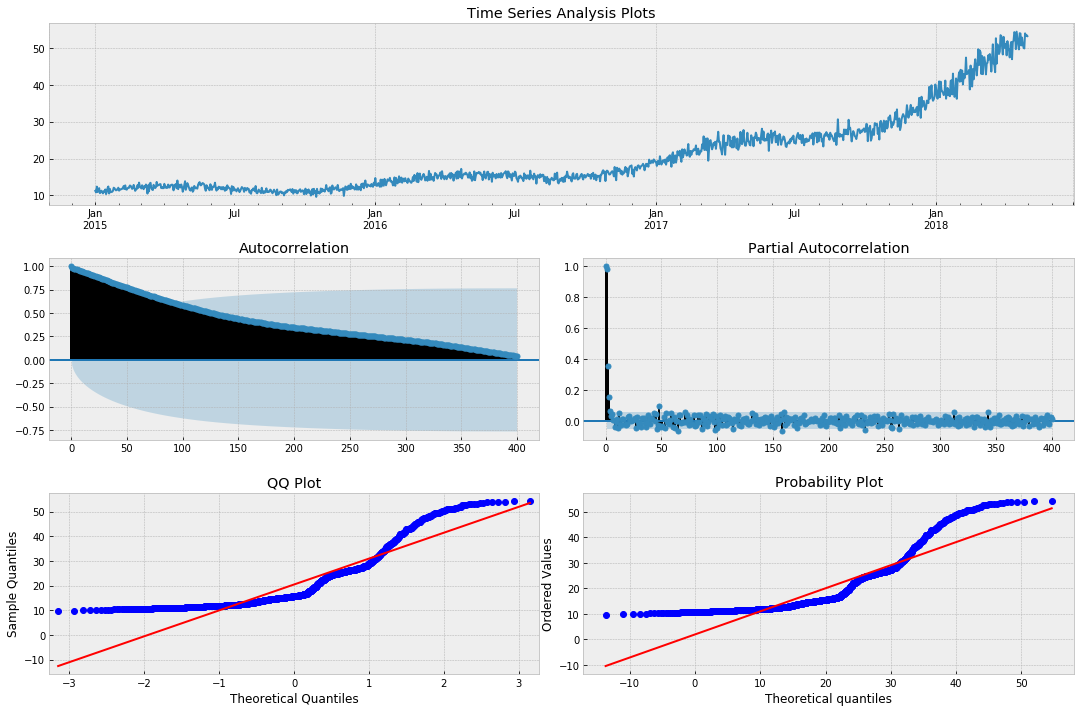

In [26]:
# plotscatter(acf, columns=['Values'], title='Auto-covariance function', yaxis='ACF')
tsplot(y=ts['Values'], lags=400)

### 4.2. Decomposition

In [27]:
# Additive model
ts_dec_additive = smt.seasonal_decompose(ts['Values'], model='additive')
ts_additive_dict = {'Series': ts['Values'], 
                    'Trend':ts_dec_additive.trend,
                    'Seasonal': ts_dec_additive.seasonal,
                    'Resid': ts_dec_additive.resid
                   }
ts_additive = pd.DataFrame(data=ts_additive_dict, index=ts.index)

In [28]:
subplotscatter(ts_additive, title='Additive Decomposition')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]
[ (4,1) x1,y4 ]



Analysis of residuals from additive-model decomposition


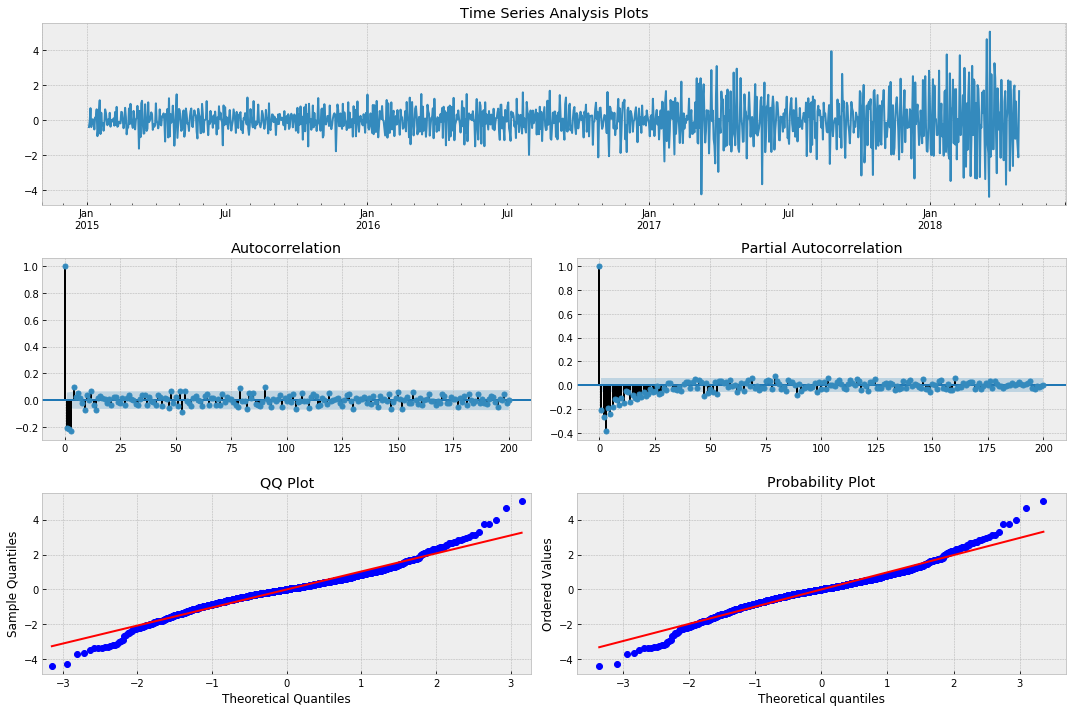

In [29]:
# Validation: ACF of residuals
print('Analysis of residuals from additive-model decomposition')
tsplot(y=ts_additive.dropna(axis=0, how='any')['Resid'], lags=200)

In [30]:
# Multiplicative model
ts_dec_multiplic = smt.seasonal_decompose(ts['Values'], model='multiplicative')
ts_multiplic_dict = {'Series': ts['Values'], 
                    'Trend':ts_dec_multiplic.trend,
                    'Seasonal': ts_dec_multiplic.seasonal,
                    'Resid': ts_dec_multiplic.resid
                   }
ts_multiplic = pd.DataFrame(data=ts_multiplic_dict, index=ts.index)

In [31]:
subplotscatter(ts_multiplic, title='Multiplicative Decomposition')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]
[ (3,1) x1,y3 ]
[ (4,1) x1,y4 ]



Analysis of residuals from multiplicative-model decomposition


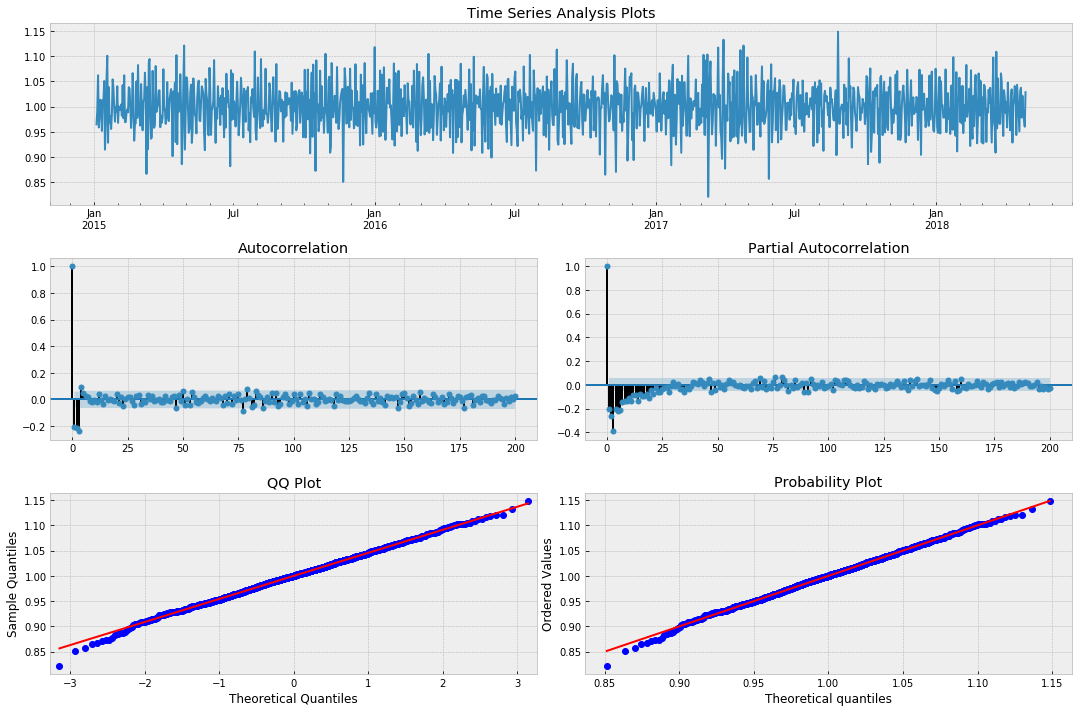

In [32]:
# Validation: ACF of residuals
print('Analysis of residuals from multiplicative-model decomposition')
tsplot(y=ts_multiplic.dropna(axis=0,how='any')['Resid'], lags=200)

# 5. Data Transformation 

## 5.1. Differencing

In [50]:
def difference_ts(ts, n=1, columns=None):
    '''Apply differencing to the time series'''
    ts = ts.dropna(axis=0,how='any')
    
    if columns is None: columns = list(ts.columns)
    
    ts_diff_dict = dict()
    for col in columns:
        ts_diff_dict[col] = np.diff(ts[col])
        
    ts_diff = pd.DataFrame(data=ts_diff_dict, index=ts.index[-len(ts_diff_dict[col]):])
    return ts_diff

In [101]:
def integrate_ts(ts, init_val=dict(), n=1, columns=None):
    '''Integrate the time series (inverse of differencing)'''
    if columns is None: columns = list(ts.columns)
    
    for i in range(n):
        ts_int_dict = dict()
        for col in columns:
            t0 = 0
            if col in init_val and len(init_val[col])>=i:
                t0 = init_val[col][-i]
            ts_int_dict[col] = np.cumsum(ts[col].values.squeeze()) + t0
        ts_int = pd.DataFrame(data=ts_int_dict, index=ts.index)
        
    return ts_int

In [1]:
def subtract_mean(ts, columns=None):
    '''Integrate the time series (inverse of differencing)'''
    if columns is None: columns = list(ts.columns)
    
    for col in columns:
        mu = ts[col].mean()
        ts[col] = ts[col] - mu
        
    return ts, mu

In [34]:
ts_diff = difference_ts(ts)

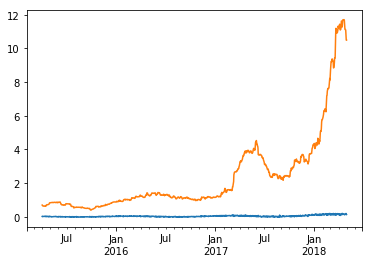

In [35]:
ts_diff.rolling(window=90, center=False).mean()['Values'].plot()
ts_diff.rolling(window=90, center=False).var()['Values'].plot()

Test Statistic                   -1.275890
p-value                           0.640129
#Lags Used                       88.000000
Number of Observations Used    1125.000000
Critical Value (1%)              -3.436176
Critical Value (5%)              -2.864113
Critical Value (10%)             -2.568140
dtype: float64


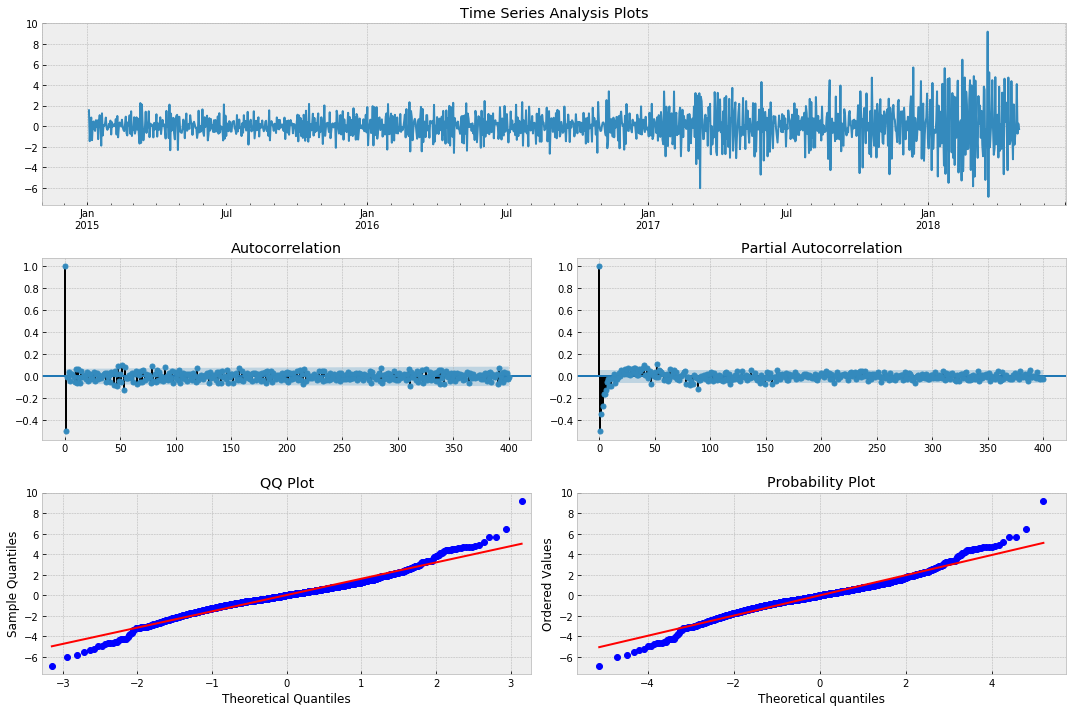

In [36]:
# Validacao da differencing
adfuller_test(ts_diff, column='Values')
tsplot(ts_diff['Values'],400)

## 5.3. Seasonal Differencing

In [37]:
def deseasonalize_ts(ts, months=0, years=1): # default: annual
    # Get last years' dates
    ts = ts.dropna(axis=0,how='any')
    current = list(ts.index[i].to_pydatetime() for i in range(len(ts.index)))
    past = list(current[i] - relativedelta(months=months, years=years) for i in range(len(ts.index)))
    ts = ts.reindex(index=pd.DatetimeIndex(np.unique(current+past)))
    current = pd.DatetimeIndex(current)
    past = pd.DatetimeIndex(past)
        
    ts_deseasonal_dict = dict()
    for col in list(ts.columns):
        ts_deseasonal_dict[col] = ts[col].loc[current].values - ts[col].loc[past].values
        
    ts_deseasonal = pd.DataFrame(data=ts_deseasonal_dict, index=current)
    
    return ts_deseasonal

In [38]:
ts_deseasonal = deseasonalize_ts(ts_diff, months=12, years=0).dropna(axis=0, how='any')

Test Statistic                -1.217942e+01
p-value                        1.362383e-22
#Lags Used                     1.600000e+01
Number of Observations Used    8.320000e+02
Critical Value (1%)           -3.438234e+00
Critical Value (5%)           -2.865020e+00
Critical Value (10%)          -2.568623e+00
dtype: float64


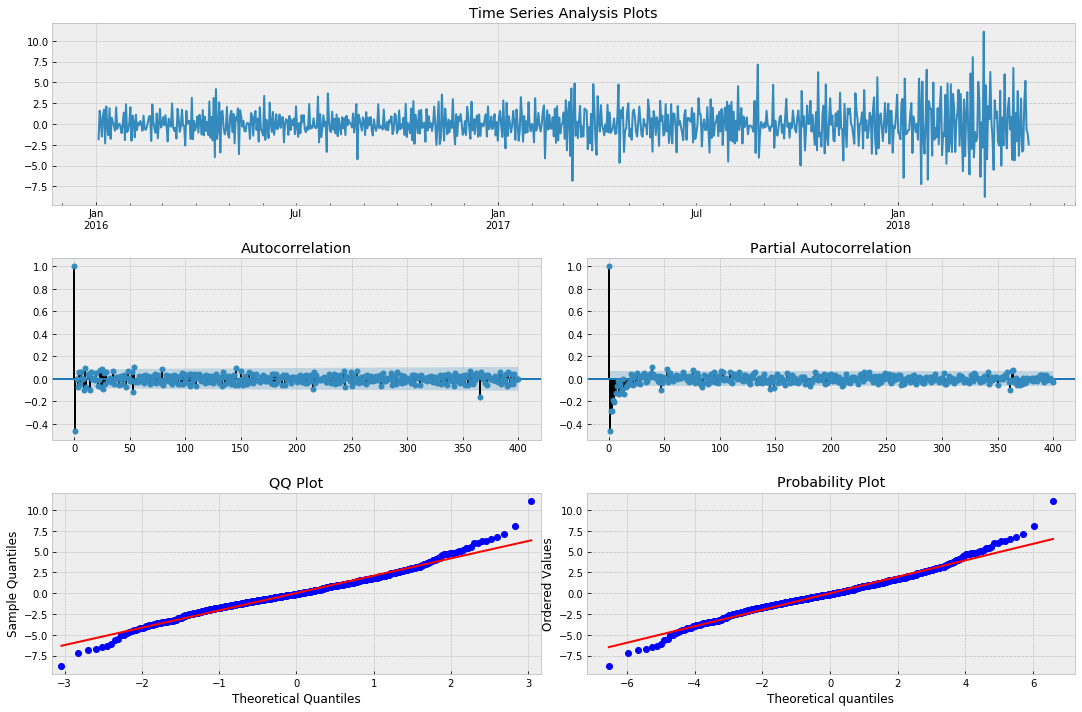

In [39]:
# Validacao do deseasonalization
adfuller_test(ts_deseasonal)
tsplot(ts_deseasonal['Values'],400)

In [40]:
unitroot_test(ts_deseasonal)



   Augmented Dickey-Fuller Results   
Test Statistic                -12.179
P-value                         0.000
Lags                               16
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

-----------------------------------------------------

      Dickey-Fuller GLS Results      
Test Statistic                  0.509
P-value                         0.839
Lags                               55
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.97 (5%), -1.65 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

-----------------------------------------------------

     Phillips-Perron Test (Z-tau)    
Test Statistic               -121.106
P-value                         0.000
Lags                              

## 5.4 Log Transform

In [41]:
ts_log = pd.DataFrame(data=ts['Values'], index=ts.index)
ts_log['Values'] = np.log(ts_log['Values'])

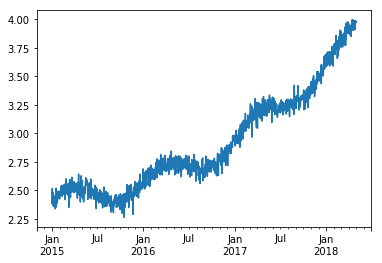

In [42]:
ts_log['Values'].plot()

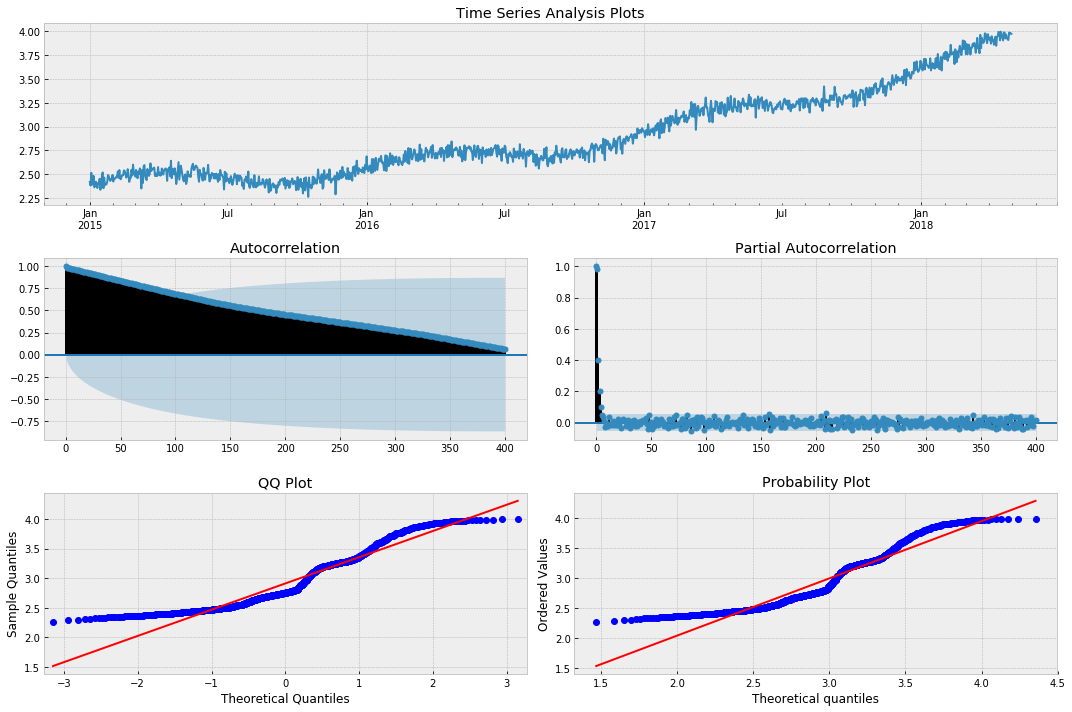

In [43]:
tsplot(ts_log['Values'], 400)

In [44]:
ts_log_diff = difference_ts(ts_log)

In [45]:
unitroot_test(ts_log_diff, max_lags=90)
stationarity_test(ts_log_diff)



   Augmented Dickey-Fuller Results   
Test Statistic                -14.406
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

-----------------------------------------------------

      Dickey-Fuller GLS Results      
Test Statistic                 -0.203
P-value                         0.619
Lags                               42
-------------------------------------

Trend: Constant
Critical Values: -2.59 (1%), -1.96 (5%), -1.64 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

-----------------------------------------------------

     Phillips-Perron Test (Z-tau)    
Test Statistic               -148.216
P-value                         0.000
Lags                              

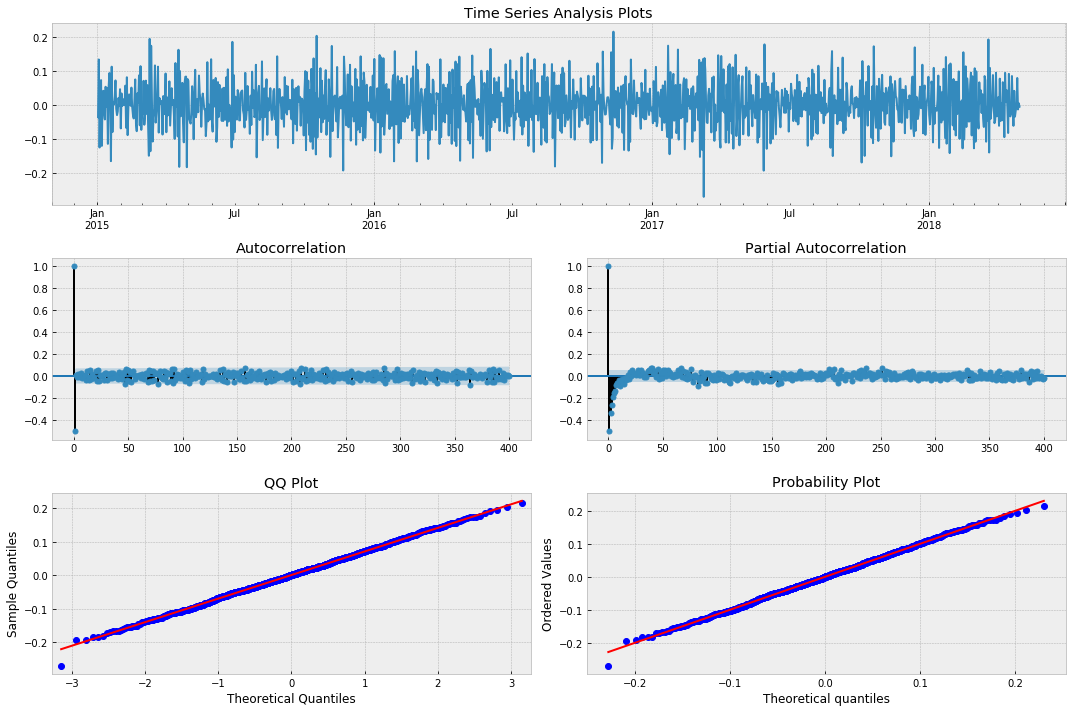

In [46]:
tsplot(ts_log_diff['Values'],400)

## 5.5. Nao-implementados

### 5.5.1. Detrending

In [47]:
from scipy import signal

def detrend_ts(ts):
    ts = ts.dropna(axis=0,how='any')
    
    ts_detrended_dict = dict()
    for col in list(ts.columns):
        ts_detrended_dict[col] = signal.detrend(ts[col].values)

    ts_detrended = pd.DataFrame(data=ts_detrended_dict, index=ts.dropna(axis=0,how='any').index)
    return ts_detrended

### 5.5.2. Denoising